In [1]:
# Import packages
from sklearn.tree import DecisionTreeClassifier

In [4]:
%run "../all_numerical_data.ipynb"

### Default Hyper Parameters: criterion="gini", plitter="best", max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0

In [5]:
# Training
dtree_model = DecisionTreeClassifier()
dtree_model.fit(x_train, y_train)

# Prediction
dtree_predictions = dtree_model.predict(x_val)
print("Tree Depth =",dtree_model.get_depth())

Tree Depth = 11


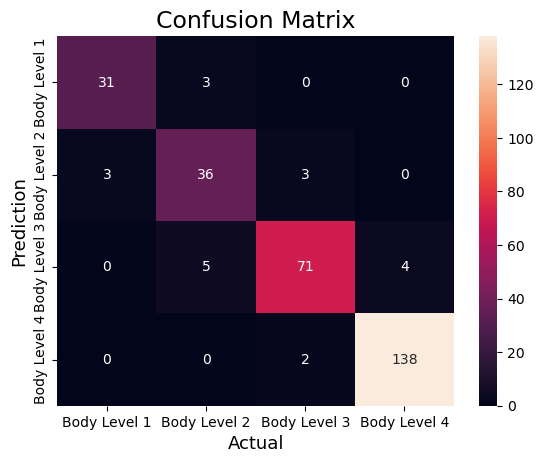

In [6]:
# Compute the confusion matrix.
cm = confusion_matrix(y_val,dtree_predictions)
# Plot the confusion matrix.
labels = list(set(df_numerical['Body_Level']))
labels.sort()
sns.heatmap(cm, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [10]:
# Finding the accuracy.
accuracy = accuracy_score(y_val,dtree_predictions)
print("Accuracy   :", accuracy)

# Finding precision and recall
precision, recall, F1_score, support = score(y_val,dtree_predictions)
print("Precision :", precision, "Macro Precision :", sum(precision)/len(precision))
print("Recall    :", recall, "Macro Recall    :", sum(recall)/len(recall))
print("F1-score  :", F1_score, "Macro F1-score  :", sum(F1_score)/len(F1_score))
print("Support  :", support, "Macro Support  :", sum(support)/len(support))
print(classification_report(y_val,dtree_predictions))

Accuracy   : 0.9324324324324325
Precision : [0.91176471 0.81818182 0.93421053 0.97183099] Macro Precision : 0.9089970090738634
Recall    : [0.91176471 0.85714286 0.8875     0.98571429] Macro Recall    : 0.910530462184874
F1-score  : [0.91176471 0.8372093  0.91025641 0.9787234 ] Macro F1-score  : 0.9094884556799159
Support  : [ 34  42  80 140] Macro Support  : 74.0
              precision    recall  f1-score   support

Body Level 1       0.91      0.91      0.91        34
Body Level 2       0.82      0.86      0.84        42
Body Level 3       0.93      0.89      0.91        80
Body Level 4       0.97      0.99      0.98       140

    accuracy                           0.93       296
   macro avg       0.91      0.91      0.91       296
weighted avg       0.93      0.93      0.93       296



### Same as default but criterion="entropy" (which is better for multiclass instead of log_loss)

In [11]:
# Training
dtree_model = DecisionTreeClassifier(criterion="entropy")
dtree_model.fit(x_train, y_train)

# Prediction
dtree_predictions = dtree_model.predict(x_val)
print("Tree Depth =",dtree_model.get_depth())

Tree Depth = 8


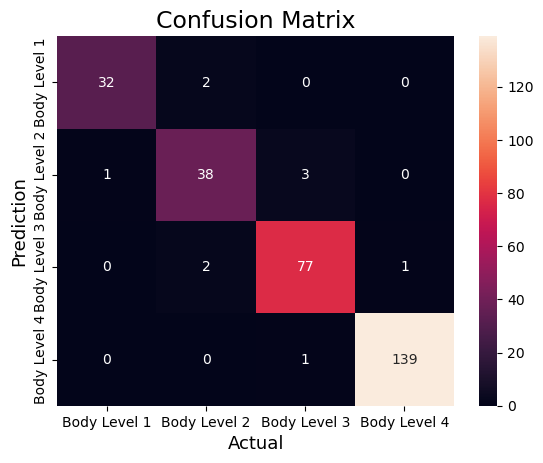

In [12]:
# Compute the confusion matrix.
cm = confusion_matrix(y_val,dtree_predictions)
# Plot the confusion matrix.
labels = list(set(df_numerical['Body_Level']))
labels.sort()
sns.heatmap(cm, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [13]:
# Finding the accuracy.
accuracy = accuracy_score(y_val,dtree_predictions)
print("Accuracy   :", accuracy)

# Finding precision and recall
precision, recall, F1_score, support = score(y_val,dtree_predictions)
print("Precision :", precision, "Macro Precision :", sum(precision)/len(precision))
print("Recall    :", recall, "Macro Recall    :", sum(recall)/len(recall))
print("F1-score  :", F1_score, "Macro F1-score  :", sum(F1_score)/len(F1_score))
print("Support  :", support, "Macro Support  :", sum(support)/len(support))
print(classification_report(y_val,dtree_predictions))

Accuracy   : 0.9662162162162162
Precision : [0.96969697 0.9047619  0.95061728 0.99285714] Macro Precision : 0.9544833253166587
Recall    : [0.94117647 0.9047619  0.9625     0.99285714] Macro Recall    : 0.9503238795518207
F1-score  : [0.95522388 0.9047619  0.95652174 0.99285714] Macro F1-score  : 0.9523411668366244
Support  : [ 34  42  80 140] Macro Support  : 74.0
              precision    recall  f1-score   support

Body Level 1       0.97      0.94      0.96        34
Body Level 2       0.90      0.90      0.90        42
Body Level 3       0.95      0.96      0.96        80
Body Level 4       0.99      0.99      0.99       140

    accuracy                           0.97       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.97      0.97      0.97       296

